<a href="https://colab.research.google.com/github/malva28/CC4102_aux_01/blob/main/CC4102_Adversario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso Big O

La definición formal: si $∃M,n_0$  tal que  $f(n) \leq Mg(n),  ∀ n \geq n_0$, entonces $f(n) = O(g(n))$. Se suele anotar también que $f \in O(g)$.

¿Qué significa esto? En terminos sencillos, que M\*g(n) es un "techo" para la función f(n) o que f(n) "no crece" más rápido que M\*g(n). En pocas palabras, **$f$ no puede ser peor que $g$**.

Dentro de $O(⋅)$ utilizamos las funciones más sencillas posibles, para notar crecimientos predecibles.

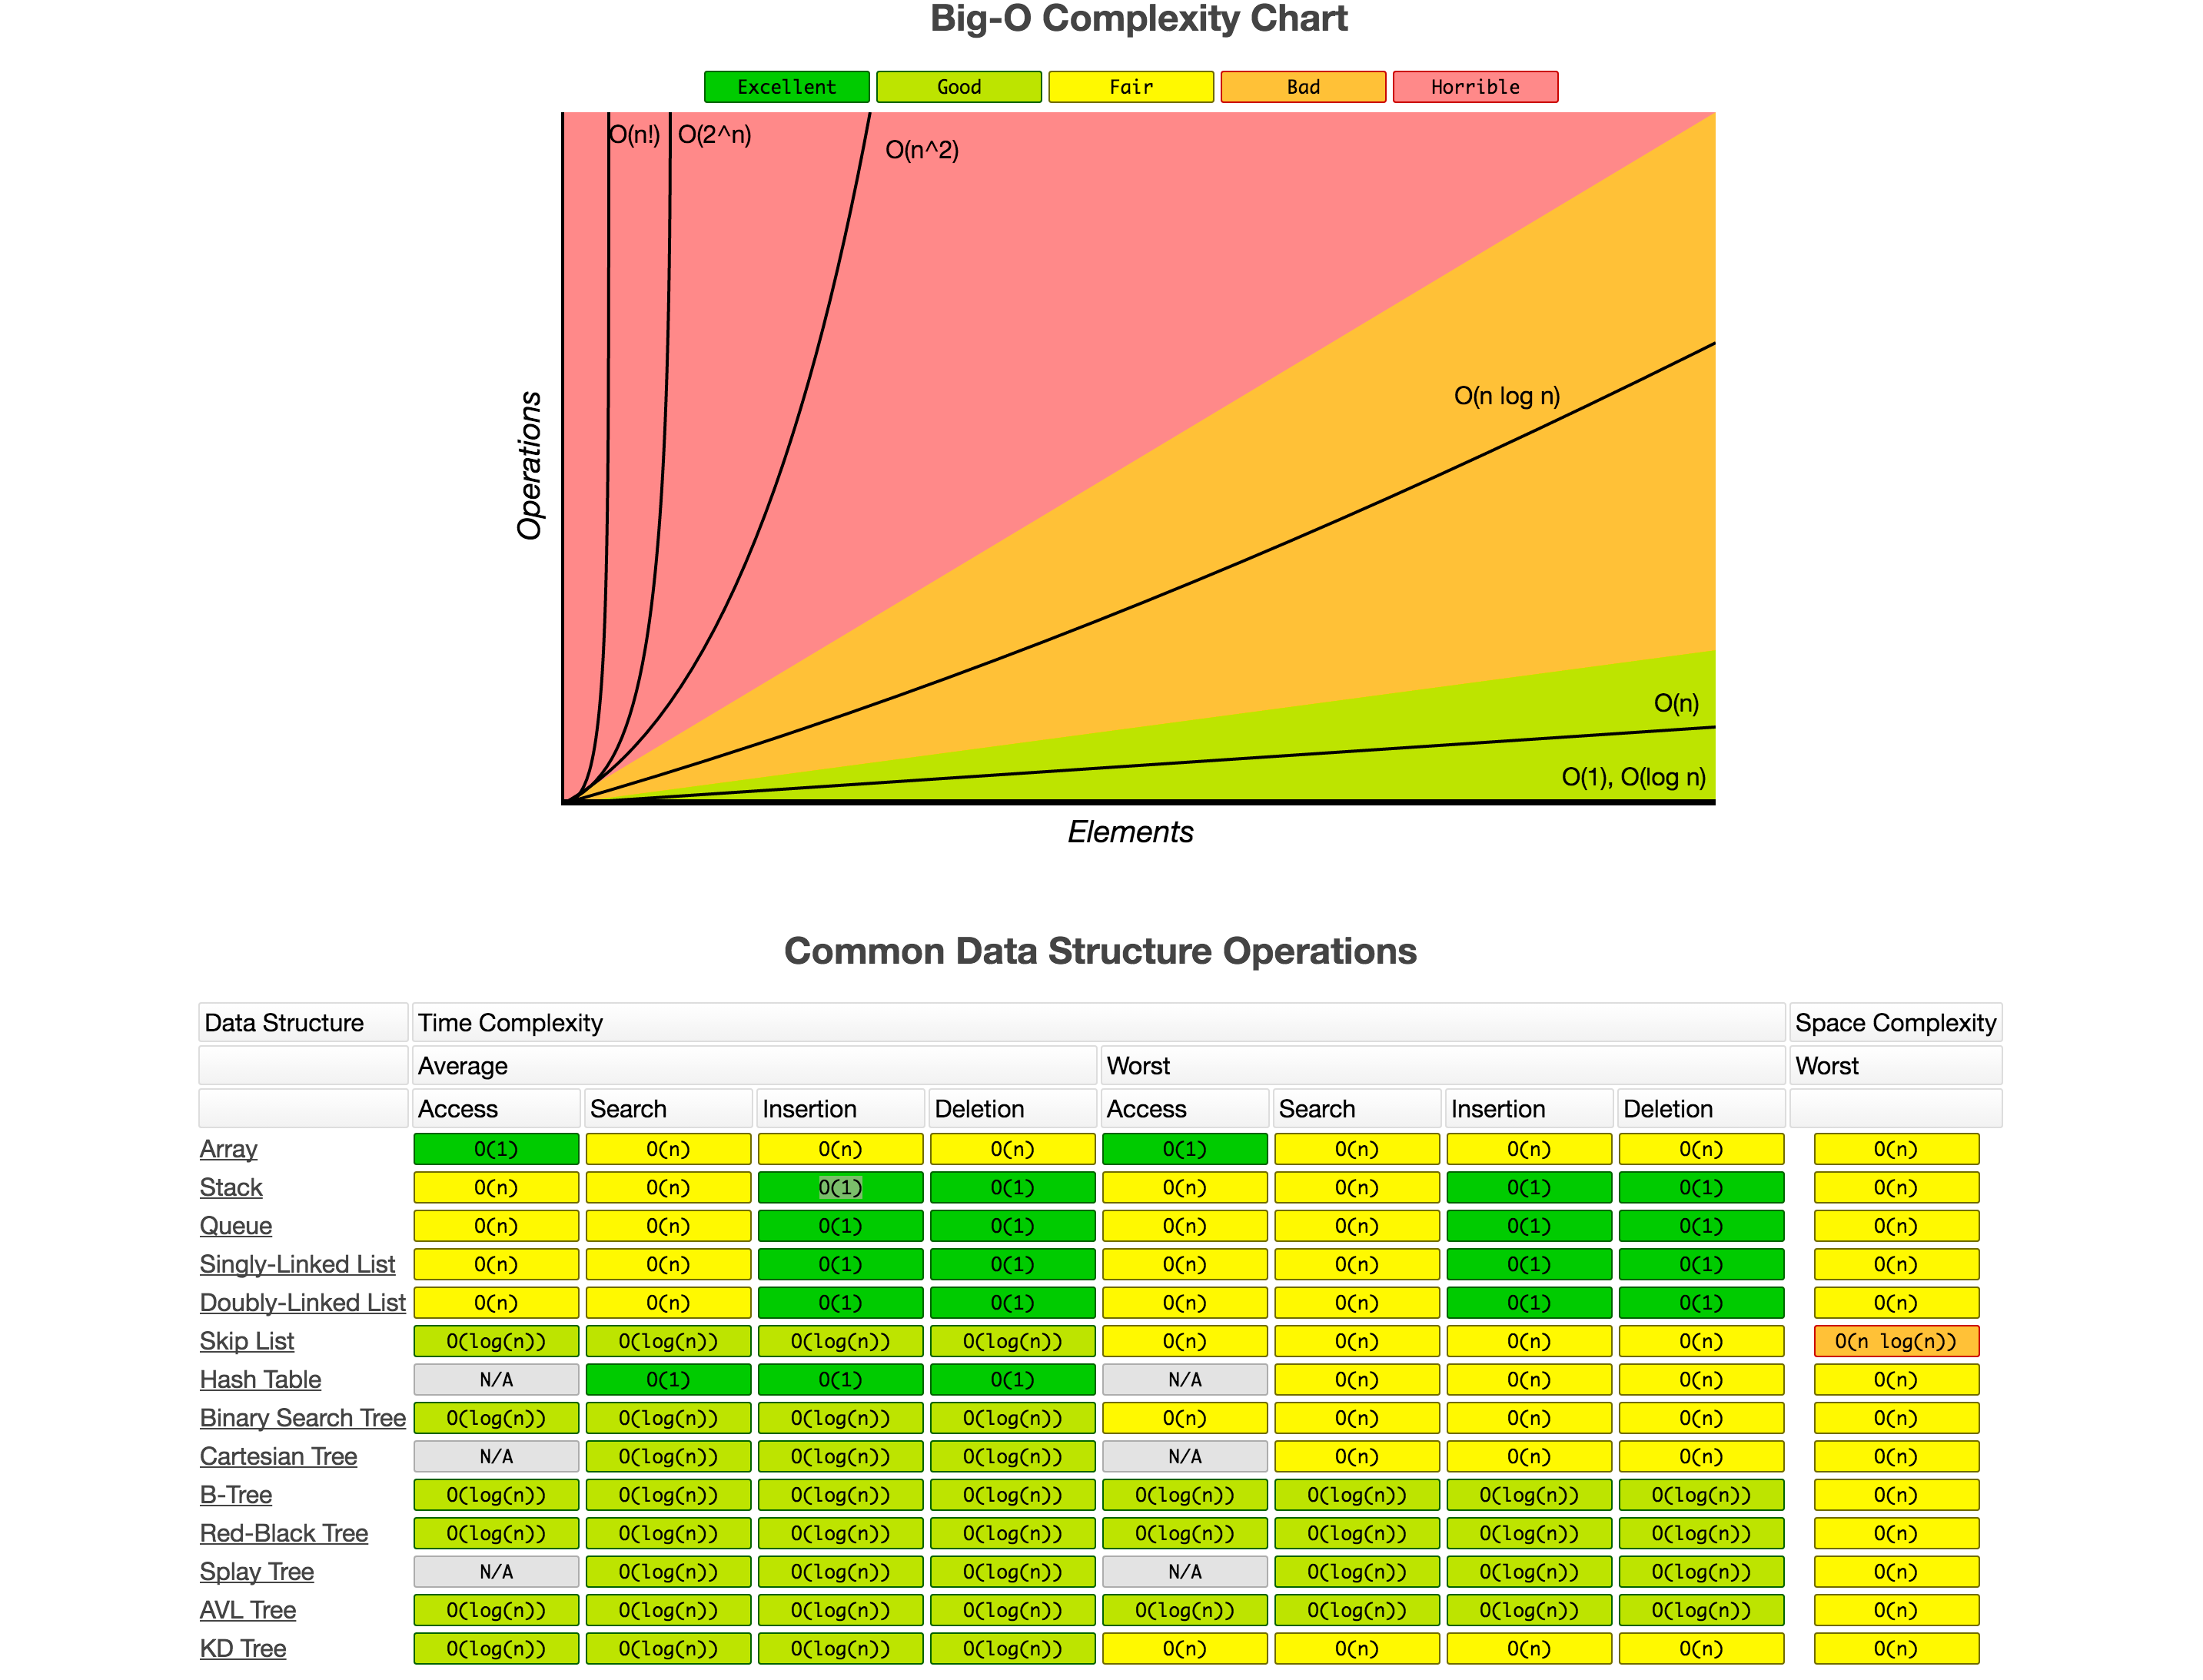

Algunas propiedades de la Gran O:

Producto:

$f_1=O(g_1){\text{ and }}f_2=O(g_2)\Rightarrow f_1f_2=O(g_1g_2)$
$f ⋅ O ( g ) = O ( f g )$ $f\cdot O(g)=O(fg) f\cdot O(g)=O(fg)$

Suma:

Si $f_1 = O(g_1)$ y $f_2 = O(g_2)$ entonces $f_1 + f_2 = O(max(g_1,g_2))$. Se deduce de lo anterior que si $f_1 = O(g)$ y $f_2= O(g)$ entonces $f_1 + f_2 \in O(g)$

¿Y qué son Ω y Θ ? Similares, pero distintas.

$Ω(⋅)$ es la notación que determina el piso de una función.

$Θ(⋅)$ es la notación que determina una función acotada.

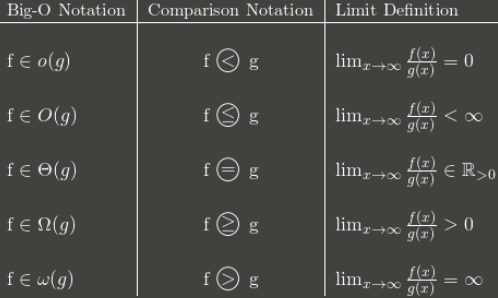

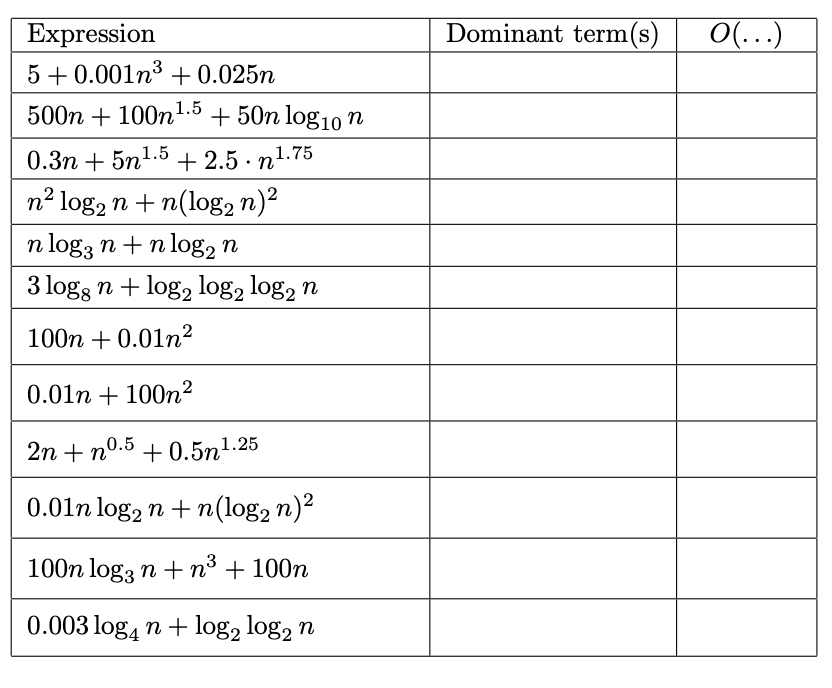

# Estrategia del Adversario

Es una estrategia para demostrar cotas inferiores del peor caso.

Tenemos un  que tiene un  y buscamos llevar a uno o más 

*   *modelo* con un 
*   *estado inicial*, donde no sabemos nada sobre el input,
*   damos *pasos* para obtener información y llegar a
*   *estados finales*, donde tenemos suficiente información para responder al problema.

El adversario busca máximizar estos pasos, buscando que nuestros pasos obtengan la menor cantidad de información posible o buscando que la respuesta se demore lo más posible en aparecer.

**EL ADVERSARIO NO ES UN ALGORITMO, NO ES LA SOLUCIÓN A UN PROBLEMA** Pero ojo, un buen algoritmo debe cumplir con el inverso del adversario: tratar de obtener la mayor cantidad posible de información en cada paso, para que la respuesta aparezca lo más rápido posible.

## Búsqueda en un arreglo

En estos ejemplos, nosotros haremos el papel del adversario frente al algoritmo. La única regla del juego es que no podemos colocar un input invalido; Por ejemplo, no podemos poner que el target está en la posición 0 de la búsqueda lineal si vamos en el index 2.

In [2]:
A = [0,1,2,3,4,5]

In [3]:
import random

In [4]:
def busq_lineal(lista):
  paso = 0
  for index in range(len(lista)):
    paso +=1
    print(f'k == {index}')
    target = int(input())
    if lista[index] == target:
      return index, paso
  return -1, paso

index, paso = busq_lineal(A)
print(f'encontrado en la posición {index} al realizar {paso} pasos.')

k == 0
5
k == 1
5
k == 2
5
k == 3
5
k == 4
5
k == 5
5
encontrado en la posición 5 al realizar 6 pasos.


In [5]:
def busq_segmentada(lista):
  paso = 0
  (i,j) = (0,len(lista)-1)
  while i<j:
    paso +=1
    k = random.randint(i,j)
    print(f'k == {k}; {k-i} >= {j-k}')
    target = int(input('si k-i>= j-k, entonces: target < k, si no: target > k\n'))
    if lista[k] < target:
      i = k+1
    elif lista[k] > target:
      j = k-1
    else:
      return k,paso
  if i == j and lista[i] == target:
    print(f'k == {i}')
    return i, paso+1
  return -1, paso

index, paso = busq_segmentada(A)
print(f'encontrado en la posición {index} al realizar {paso} paso/s.')

k == 5; 5 >= 0
si k-i>= j-k, entonces: target < k, si no: target > k
4
k == 0; 0 >= 4
si k-i>= j-k, entonces: target < k, si no: target > k
3
k == 2; 1 >= 2
si k-i>= j-k, entonces: target < k, si no: target > k
2
encontrado en la posición 2 al realizar 3 paso/s.


In [ ]:
def busq_binaria(lista):
  paso = 0
  (i,j) = (0,len(lista)-1)
  while i<j:
    paso +=1
    k = (j+i)//2
    print(f'k == {k}; {k-i} >= {j-k}')
    target = int(input('si k-i>= j-k, entonces: target < k, si no: target > k\n'))
    if lista[k] < target:
      i = k+1
    elif lista[k] > target:
      j = k-1
    else:
      return k,paso
  if i == j and lista[i] == target:
    print(f'k == {i}')
    return i, paso+1
  return -1, paso

index, paso = busq_binaria(A)
print(f'encontrado en la posición {index} al realizar {paso} paso/s.')

k == 2; 2 >= 3
si k-i>= j-k, entonces: target < k, si no: target > k
4
k == 4; 1 >= 1
si k-i>= j-k, entonces: target < k, si no: target > k
3
k == 3
encontrado en la posición 3 al realizar 3 paso/s.


In [ ]:
import math
int(math.log2(len(A)))

2

¿Qué pasa si escogemos valores distintos a los indicados en el input? ¿Podemos tener un adversario mejor? ¿Cómo saberlo? Esto nos da a entender que este método no tiene porque dar cotas inferiores ajustadas.

## Máximo de un arreglo

En este caso, lo que buscamos es maximizar la cantidad de información que obtenemos por cada paso, a modo que la respuesta correcta no se encuentre en aquel lugar donde no tenemos información.

In [ ]:
A = [random.randint(0, 10) for i in range(11)]

In [ ]:
A

[1, 8, 3, 5, 2, 7, 4, 9, 4, 10, 1]

In [ ]:
import graphviz
from IPython.display import display_svg, SVG,display

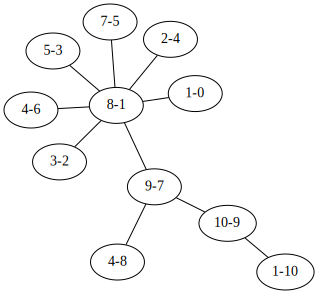

In [ ]:
def max_lineal_graph(lista, h):
  paso = 0
  maximo = lista[0]
  posicion = 0
  for index in range(1, len(lista)):
    paso +=1
    h.edge(f'{lista[index]}-{index}', f'{maximo}-{posicion}')
    if lista[index] > maximo:
      maximo = lista[index]
      posicion = index
  return posicion, maximo, paso

h1 = graphviz.Graph(engine="neato",format="svg")
index, max, paso = max_lineal_graph(A, h1)
svg = h1.pipe().decode('utf-8')
SVG(svg)

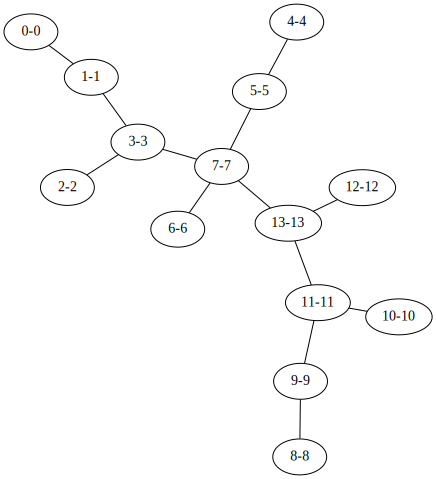

In [ ]:
def max_torneo_with_graph(lista, h, paso = 0, posiciones_iniciales = []):
  if len(lista) <= 1:
    return posiciones_iniciales[0], lista[0], paso
  
  ganadores = []
  posiciones = []
  for index in range(0,len(lista),2):
    if len(lista) <= (index+1):
      ganadores.append(lista[index])
      if len(posiciones_iniciales) > 0:
        posiciones.append(posiciones_iniciales[index])
      else:
        posiciones.append(index)
    else:
      paso +=1
      if len(posiciones_iniciales) > 0:
        h.edge(f'{lista[index]}-{posiciones_iniciales[index]}', f'{lista[index+1]}-{posiciones_iniciales[index+1]}')
      else:
        h.edge(f'{lista[index]}-{index}', f'{lista[index+1]}-{index+1}')

      if lista[index] > lista[index+1]:
        ganadores.append(lista[index])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index])
        else:
          posiciones.append(index)
      else:
        ganadores.append(lista[index+1])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index+1])
        else:
          posiciones.append(index+1)
  
  return max_torneo_with_graph(ganadores, h, paso, posiciones)

h2 = graphviz.Graph(engine="neato",format="svg")
for index,value in enumerate(A):
  h2.node(f'{value}-{index}')
index, max, paso = max_torneo_with_graph(A, h2)
svg = h2.pipe().decode('utf-8')
SVG(svg)

In [ ]:
def max_torneo(lista, paso = 0, posiciones_iniciales = [], perdedores = 0):
  print(lista)
  print(f'contendores: {len(lista)}; perdedores: {perdedores}')
  if len(lista) <= 1:
    return posiciones_iniciales[0], lista[0], paso
  
  ganadores = []
  posiciones = []
  for index in range(0,len(lista),2):
    if len(lista) <= (index+1):
      ganadores.append(lista[index])
      if len(posiciones_iniciales) > 0:
        posiciones.append(posiciones_iniciales[index])
      else:
        posiciones.append(index)
    else:
      paso +=1
      perdedores +=1
      if lista[index] > lista[index+1]:
        ganadores.append(lista[index])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index])
        else:
          posiciones.append(index)
      else:
        ganadores.append(lista[index+1])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index+1])
        else:
          posiciones.append(index+1)
  
  return max_torneo(ganadores, paso, posiciones, perdedores)

In [ ]:
index, max, paso = max_torneo(A)
print(f'El máximo {max} fue encontrado en la posición {index} al realizar {paso} pasos.')

[18, 26, 18, 8, 21, 9, 19, 6, 17, 21, 16, 22, 22, 16, 13, 23, 6, 15, 22, 15, 28]
contendores: 21; perdedores: 0
[26, 18, 21, 19, 21, 22, 22, 23, 15, 22, 28]
contendores: 11; perdedores: 10
[26, 21, 22, 23, 22, 28]
contendores: 6; perdedores: 15
[26, 23, 28]
contendores: 3; perdedores: 18
[26, 28]
contendores: 2; perdedores: 19
[28]
contendores: 1; perdedores: 20
El máximo 28 fue encontrado en la posición 20 al realizar 20 pasos.


In [ ]:
def max_lineal(lista):
  print(f'({len(lista)}, 0, 0)')
  paso = 0
  maximo = lista[0]
  posicion = 0
  for index in range(1, len(lista)):
    paso +=1
    if lista[index] > maximo:
      maximo = lista[index]
      posicion = index
    print(f'({len(lista)-1-index}, 1, {index})')
  return posicion, maximo, paso

index, max, paso = max_lineal(A)
print(f'El máximo {max} fue encontrado en la posición {index} al realizar {paso} pasos.')

(11, 0, 0)
(9, 1, 1)
(8, 1, 2)
(7, 1, 3)
(6, 1, 4)
(5, 1, 5)
(4, 1, 6)
(3, 1, 7)
(2, 1, 8)
(1, 1, 9)
(0, 1, 10)
El máximo 10 fue encontrado en la posición 9 al realizar 10 pasos.


Ninguno de los algoritmos utilizados compara perdedores, pues no aporta información útil para el problema a resolver.

## Min/Max de un arreglo

Podemos utilizar los mismos algoritmos anteriores, invirtiendo la búsqueda y tendriamos los mismos tiempos de usarlos dos veces, excluyendo el ganador de una de las comparaciones $2(n-1) = 2n-2-1 = 2n-3$  ¿Es el óptimo?

In [ ]:
A = [random.randint(0, 30) for i in range(21)]

In [ ]:
print(2*len(A)-3)

39


In [ ]:
def min_torneo(lista, paso = 0, posiciones_iniciales = [], ganadores = 0):
  print(lista)
  print(f'contendores: {len(lista)}; ganadores: {ganadores}')
  if len(lista) <= 1:
    return posiciones_iniciales[0], lista[0], paso
  
  perdedores = []
  posiciones = []
  for index in range(0,len(lista),2):
    if len(lista) <= (index+1):
      perdedores.append(lista[index])
      if len(posiciones_iniciales) > 0:
        posiciones.append(posiciones_iniciales[index])
      else:
        posiciones.append(index)
    else:
      paso +=1
      ganadores +=1
      if lista[index] > lista[index+1]:
        perdedores.append(lista[index+1])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index+1])
        else:
          posiciones.append(index+1)
      else:
        perdedores.append(lista[index])
        if len(posiciones_iniciales) > 0:
          posiciones.append(posiciones_iniciales[index])
        else:
          posiciones.append(index)
  
  return min_torneo(perdedores, paso, posiciones, ganadores)

In [ ]:
def min_max_torneo(lista):
  index1, max, paso = max_torneo(lista)
  lista_sin_ganador = lista[:index1] + lista[index+1:]
  index2, min, paso = min_torneo(lista_sin_ganador, paso)
  return index1, max, index2, min, paso

ind1, max, ind2, min, paso = min_max_torneo(A)
print(f'El max-index fue {max}-{ind1} y min-index fue {min}-{ind2} al realizar {paso} pasos.')

[18, 26, 18, 8, 21, 9, 19, 6, 17, 21, 16, 22, 22, 16, 13, 23, 6, 15, 22, 15, 28]
contendores: 21; perdedores: 0
[26, 18, 21, 19, 21, 22, 22, 23, 15, 22, 28]
contendores: 11; perdedores: 10
[26, 21, 22, 23, 22, 28]
contendores: 6; perdedores: 15
[26, 23, 28]
contendores: 3; perdedores: 18
[26, 28]
contendores: 2; perdedores: 19
[28]
contendores: 1; perdedores: 20
[18, 26, 18, 8, 21, 9, 19, 6, 17, 21, 16, 22, 22, 16, 13, 23, 6, 15, 22, 15]
contendores: 20; ganadores: 0
[18, 8, 9, 6, 17, 16, 16, 13, 6, 15]
contendores: 10; ganadores: 10
[8, 6, 16, 13, 6]
contendores: 5; ganadores: 15
[6, 13, 6]
contendores: 3; ganadores: 17
[6, 6]
contendores: 2; ganadores: 18
[6]
contendores: 1; ganadores: 19
El max-index fue 28-20 y min-index fue 6-7 al realizar 39 pasos.


In [ ]:
def min_max_torneo_optimo(lista):
  print(lista)
  print(f'Tamaño inicial: {len(lista)}')

  paso=0
  ganadores = []
  perdedores = []
  posiciones_ganadores = []
  posiciones_perdedores = []
  for index in range(0,len(lista),2):
    if len(lista) <= (index+1):
      ganadores.append(lista[index])
      perdedores.append(lista[index])
      posiciones_ganadores.append(index)
      posiciones_perdedores.append(index)
    else:
      paso +=1
      if lista[index] > lista[index+1]:
        ganadores.append(lista[index])
        perdedores.append(lista[index+1])
        posiciones_ganadores.append(index)
        posiciones_perdedores.append(index+1)
      else:
        ganadores.append(lista[index+1])
        perdedores.append(lista[index])
        posiciones_ganadores.append(index+1)
        posiciones_perdedores.append(index)

  print('Torneo de ganadores')
  index1, max, paso = max_torneo(ganadores, paso, posiciones_ganadores)
  print('Torneo de perdedores')
  index2, min, paso = min_torneo(perdedores, paso, posiciones_perdedores)
  return index1, max, index2, min, paso

ind1, max, ind2, min, paso = min_max_torneo_optimo(A)
print(f'El max-index fue {max}-{ind1} y min-index fue {min}-{ind2} al realizar {paso} pasos.')

[18, 26, 18, 8, 21, 9, 19, 6, 17, 21, 16, 22, 22, 16, 13, 23, 6, 15, 22, 15, 28]
Tamaño inicial: 21
Torneo de ganadores
[26, 18, 21, 19, 21, 22, 22, 23, 15, 22, 28]
contendores: 11; perdedores: 0
[26, 21, 22, 23, 22, 28]
contendores: 6; perdedores: 5
[26, 23, 28]
contendores: 3; perdedores: 8
[26, 28]
contendores: 2; perdedores: 9
[28]
contendores: 1; perdedores: 10
Torneo de perdedores
[18, 8, 9, 6, 17, 16, 16, 13, 6, 15, 28]
contendores: 11; ganadores: 0
[8, 6, 16, 13, 6, 28]
contendores: 6; ganadores: 5
[6, 13, 6]
contendores: 3; ganadores: 8
[6, 6]
contendores: 2; ganadores: 9
[6]
contendores: 1; ganadores: 10
El max-index fue 28-20 y min-index fue 6-7 al realizar 30 pasos.


In [ ]:
print(math.ceil(len(A)*(1.5)) - 2)

30


## Máximo y segundo lugar

Usando la idea del grafo conexo para demostrar cota inferior, considerando *n* valores para el input y *m* candidatos a segundo valor. ¿Cual es el tamaño de *m*?

In [ ]:
A = [0,1,2,3,4,5,6,7]

El max-index fue 7-7 al realizar 7 pasos.


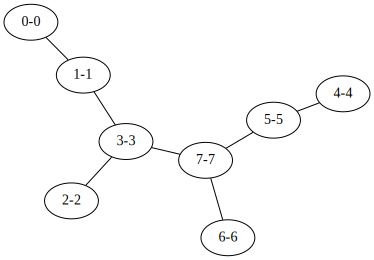

In [ ]:
h3 = graphviz.Graph(engine="neato",format="svg", strict=True)
for index,value in enumerate(A):
  h3.node(f'{value}-{index}')

index, max, paso = max_torneo_with_graph(A, h3)
print(f'El max-index fue {max}-{index} al realizar {paso} pasos.')
svg = h3.pipe().decode('utf-8')
SVG(svg)

In [ ]:
vars(h3)

{'name': None,
 'comment': None,
 'filename': 'Graph.gv',
 '_format': 'svg',
 '_engine': 'neato',
 '_encoding': 'utf-8',
 'graph_attr': {},
 'node_attr': {},
 'edge_attr': {},
 'body': ['\t"0-0"',
  '\t"1-1"',
  '\t"2-2"',
  '\t"3-3"',
  '\t"4-4"',
  '\t"5-5"',
  '\t"6-6"',
  '\t"7-7"',
  '\t"0-0" -- "1-1"',
  '\t"2-2" -- "3-3"',
  '\t"4-4" -- "5-5"',
  '\t"6-6" -- "7-7"',
  '\t"1-1" -- "3-3"',
  '\t"5-5" -- "7-7"',
  '\t"3-3" -- "7-7"'],
 'strict': True}

In [ ]:
h3.body.remove('\t"7-7"')

In [ ]:
h3.body.remove('\t"6-6" -- "7-7"')
h3.body.remove('\t"5-5" -- "7-7"')
h3.body.remove('\t"3-3" -- "7-7"')

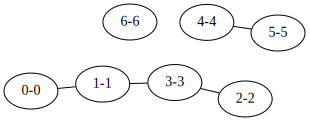

In [ ]:
h3

In [ ]:
math.ceil(math.log2(len(A)))

3

Conectar el grafo anterior (equivalente a encontrar el segundo máximo) requiere $log(n)-1$ arcos, por lo que $m = log(n)$. 

¿Es esto el óptimo para el problema? Vamos a demostrar que un adversario puede conseguir que $m= ⌈log_2 n⌉$.

In [ ]:
def max_torneo_con_weights(lista, pesos, paso = 0, posiciones_iniciales = []):
  if len(lista) <= 1:
    return posiciones_iniciales[0], lista[0], paso
  
  ganadores = []
  posiciones = []
  for index in range(0,len(lista),2):
    if len(lista) <= (index+1):
      ganadores.append(lista[index])
      if len(posiciones_iniciales) > 0:
        posiciones.append(posiciones_iniciales[index])
      else:
        posiciones.append(index)
    else:
      paso +=1
      if lista[index] > lista[index+1]:
        ganadores.append(lista[index])
        if len(posiciones_iniciales) > 0:
          pesos[posiciones_iniciales[index]].append(pesos[posiciones_iniciales[index+1]])
          posiciones.append(posiciones_iniciales[index])
        else:
          pesos[index].append(pesos[index+1])
          posiciones.append(index)
      else:
        ganadores.append(lista[index+1])
        if len(posiciones_iniciales) > 0:
          pesos[posiciones_iniciales[index+1]].append(pesos[posiciones_iniciales[index]])
          posiciones.append(posiciones_iniciales[index+1])
        else:
          pesos[index+1].append(pesos[index])
          posiciones.append(index+1)
  
  return max_torneo_con_weights(ganadores, pesos, paso, posiciones)

$W(k)$ debe partir en $w(k)=|W(k)|=1$ y llegar a $w(k) = n$ para haber resuelto el problema (o lo que es lo mismo, debe haber sido comparado con todos los valores de forma recursiva). Esto se consigue si $A[k]$ ha hecho al menos $log_2 n$ comparaciones para poder llegar a su posición, donde $k$ es el indice en el arreglo del valor máximo.

In [ ]:
W = {}
for index, value in enumerate(A):
  W[index] = [value]
W #El estado inicial del arreglo W, guardado como diccionario para hacer máx explicito su indice.

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7]}

In [ ]:
k, max, paso = max_torneo_con_weights(A, W)
print(f'El max-index fue {max}-{k} al realizar {paso} pasos.')
print(W[k]) #Exploración visual de como el ganador se comparó contra todos los otros elementos
print(len(W[k])) #la cantidad de comparaciones que hizo el ganador

El max-index fue 7-7 al realizar 7 pasos.
[7, [6], [5, [4]], [3, [2], [1, [0]]]]
4


In [ ]:
W #Estado final de W

{0: [0],
 1: [1, [0]],
 2: [2],
 3: [3, [2], [1, [0]]],
 4: [4],
 5: [5, [4]],
 6: [6],
 7: [7, [6], [5, [4]], [3, [2], [1, [0]]]]}

##Mediana de un arreglo

Encontrar la mediana *z* de un arreglo $|A|=n$ con $n$ impar. Este es un problema cuyo valor exacto no se conoce, pero su cota inferior está dada por $(2+2^{-50})n$ y su cota superior por $2,95n$.

Mostraremos una cota inferior más sencilla de $\frac{3(n-1)}{2}$ usando el adversario en dos pasos.

In [ ]:
A = [3, 23, 1,  26, 3, 22, 15, 29, 12, 28, 19] #elementos nunca antes comparados
B = [] #elementos comparados al menos una vez y el adversario le asigna un mayor valor que z
C = [] #elementos comparados al menos una vez y el adversario le asigna un tienen menor valor que z

In [ ]:
sorted(A)[5] #la mediana para nuestro arreglo

19

In [ ]:
3*(len(A)-1)/2 #tiempo que piso que debería tomar

15.0

10


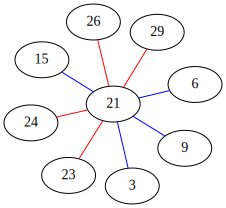

In [ ]:
h4 = graphviz.Graph(engine="neato",format="svg", strict=True)
for value in A:
  h4.node(f'{value}')

n = len(A)

pasos= 0
while (len(B) < (n-1)/2 and len(C) < (n-1)/2):
  a = b = c = [-1, -1]
  pasos +=1
  print(A)
  print(B)
  print(C)
  comparacion1 = input('¿qué elemento uno queremos comparar contra z? ¿a, b o c?')
  if comparacion1 == 'a':
    a[0] = A.pop()
  elif comparacion1 == 'b':
    b[0] = B.pop()
  elif comparacion1 == 'c':
    c[0] = C.pop()

  comparacion2 = input('¿qué elemento dos queremos comparar contra z? ¿a, b o c?')
  if comparacion2 == 'a':
    a[1] = A.pop()
  elif comparacion1 == 'b':
    b[1] = B.pop()
  elif comparacion1 == 'c':
    c[1] = C.pop()

  if a[0] > -1: 
    print('Esta es una comparación no-crucial, el adversario guarda el z para el final')
    if a[1] > -1:
      h4.edge(f'{a[0]}', f'{a[1]}')
      if a[0] > a[1]:
        B.append(a[0])
        C.append(a[1])
      else:
        B.append(a[1])
        C.append(a[0])
    else:
      if b[1] > -1:
        h4.edge(f'{a[0]}', f'{b[1]}')
        B.append(b[1])
        C.append(a[0])
      else:
        h4.edge(f'{a[0]}', f'{c[1]}')
        B.append(a[0])
        C.append(c[1])
  else:
    if b[0] > -1:
      B.append(b[0])
      if a[1] > -1:
        print('Esta es una comparación no-crucial, el adversario guarda el z para el final')
        C.append(a[1])
        h4.edge(f'{b[0]}', f'{a[1]}')
      if c[1] > -1:
        print('Esta podría ser una comparación crucial, no lo sabemos aun')
        C.append(c[1])
        h4.edge(f'{b[0]}', f'{c[1]}')
    if c[0] > -1:
      C.append(c[0])
      if a[1] > -1:
        print('Esta es una comparación no-crucial, el adversario guarda el z para el final')
        B.append(a[1])
        h4.edge(f'{c[0]}', f'{a[1]}')
      if b[1] > -1:
        print('Esta podría ser una comparación crucial, no lo sabemos aun')
        B.append(b[1])
        h4.edge(f'{c[0]}', f'{b[1]}')


print('¿qué elementos quedan en cada arreglo?')
print(A)
print(B)
print(C)
while (len(B) > len(C) and len(A) > 1):
  C.append(A.pop())
while (len(C) > len(B) and len(A) > 1):
  B.append(A.pop())
z = A.pop()
#El adversario sabe que z = 19, por lo que lo guarda como z

print(B)
print(C)
print(pasos)

Noten que si buscamos minimizar la cantidad de pasos dados en esta primera parte, necesariamente tendremos que hacer solo comparaciones no cruciales, y dejaremos las comparaciones cruciales para la parte donde completamos el grafo con colores.

In [ ]:
for x in B:
  pasos += 1
  if x > z :
    h4.edge(f'{x}', f'{z}', color='red')

for y in C:
  if y < z :
    h4.edge(f'{x}', f'{z}', color='blue')

svg = h4.pipe().decode('utf-8')
print(pasos)
SVG(svg)

[24, 9, 23, 26, 29, 29]
[3, 6, 21, 15, 6]
15


Recuerden, para poder vencer al adversario, necesitamos tener la información completa del input a modo que el adversario no pueda decir "te equivocas, la respuesta correcta está donde no revisaste".

# Ejercicios

CC4102 - 2022-Otoño Ejercicio Formativo 1 (Autor: Pablo Barcelo)

Considere una función Booleana $f : \{0, 1\}^n \rightarrow  \{0, 1\} (n > 0)$ (es decir, una función que recibe una serie de bits de tamaño n y retorna True o False). Queremos determinar si $f(w) = 1$, para $w \in \{0, 1\}^n$, haciendo sólo preguntas de la forma: ¿es cierto que el i-ésimo bit de *w* es un 1?

Decimos que $f$ es evasiva si para determinar si $f(w) = 1$ es cierto requerimos hacer exactamente *n* de estas preguntas (es decir, necesitamos preguntar por el valor de todos los bits de *w* en el peor caso).

Demuestre que la función $f : \{0; 1\}^n → \{0, 1\}$ tal que $f(w) = 1$ ssi *w* contiene al menos tres 0s consecutivos es evasiva para *n* = 4, pero no es evasiva para *n* = 5.